In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn .model_selection import train_test_split


In [2]:
data = pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# **EXPLORATORY DATA ANALYSIS**

In [3]:
data.isnull().value_counts()

Sex    Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  Shell weight  Rings
False  False   False     False   False         False           False           False         False    4177
Name: count, dtype: int64

C:\Users\KhadijehValipour\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


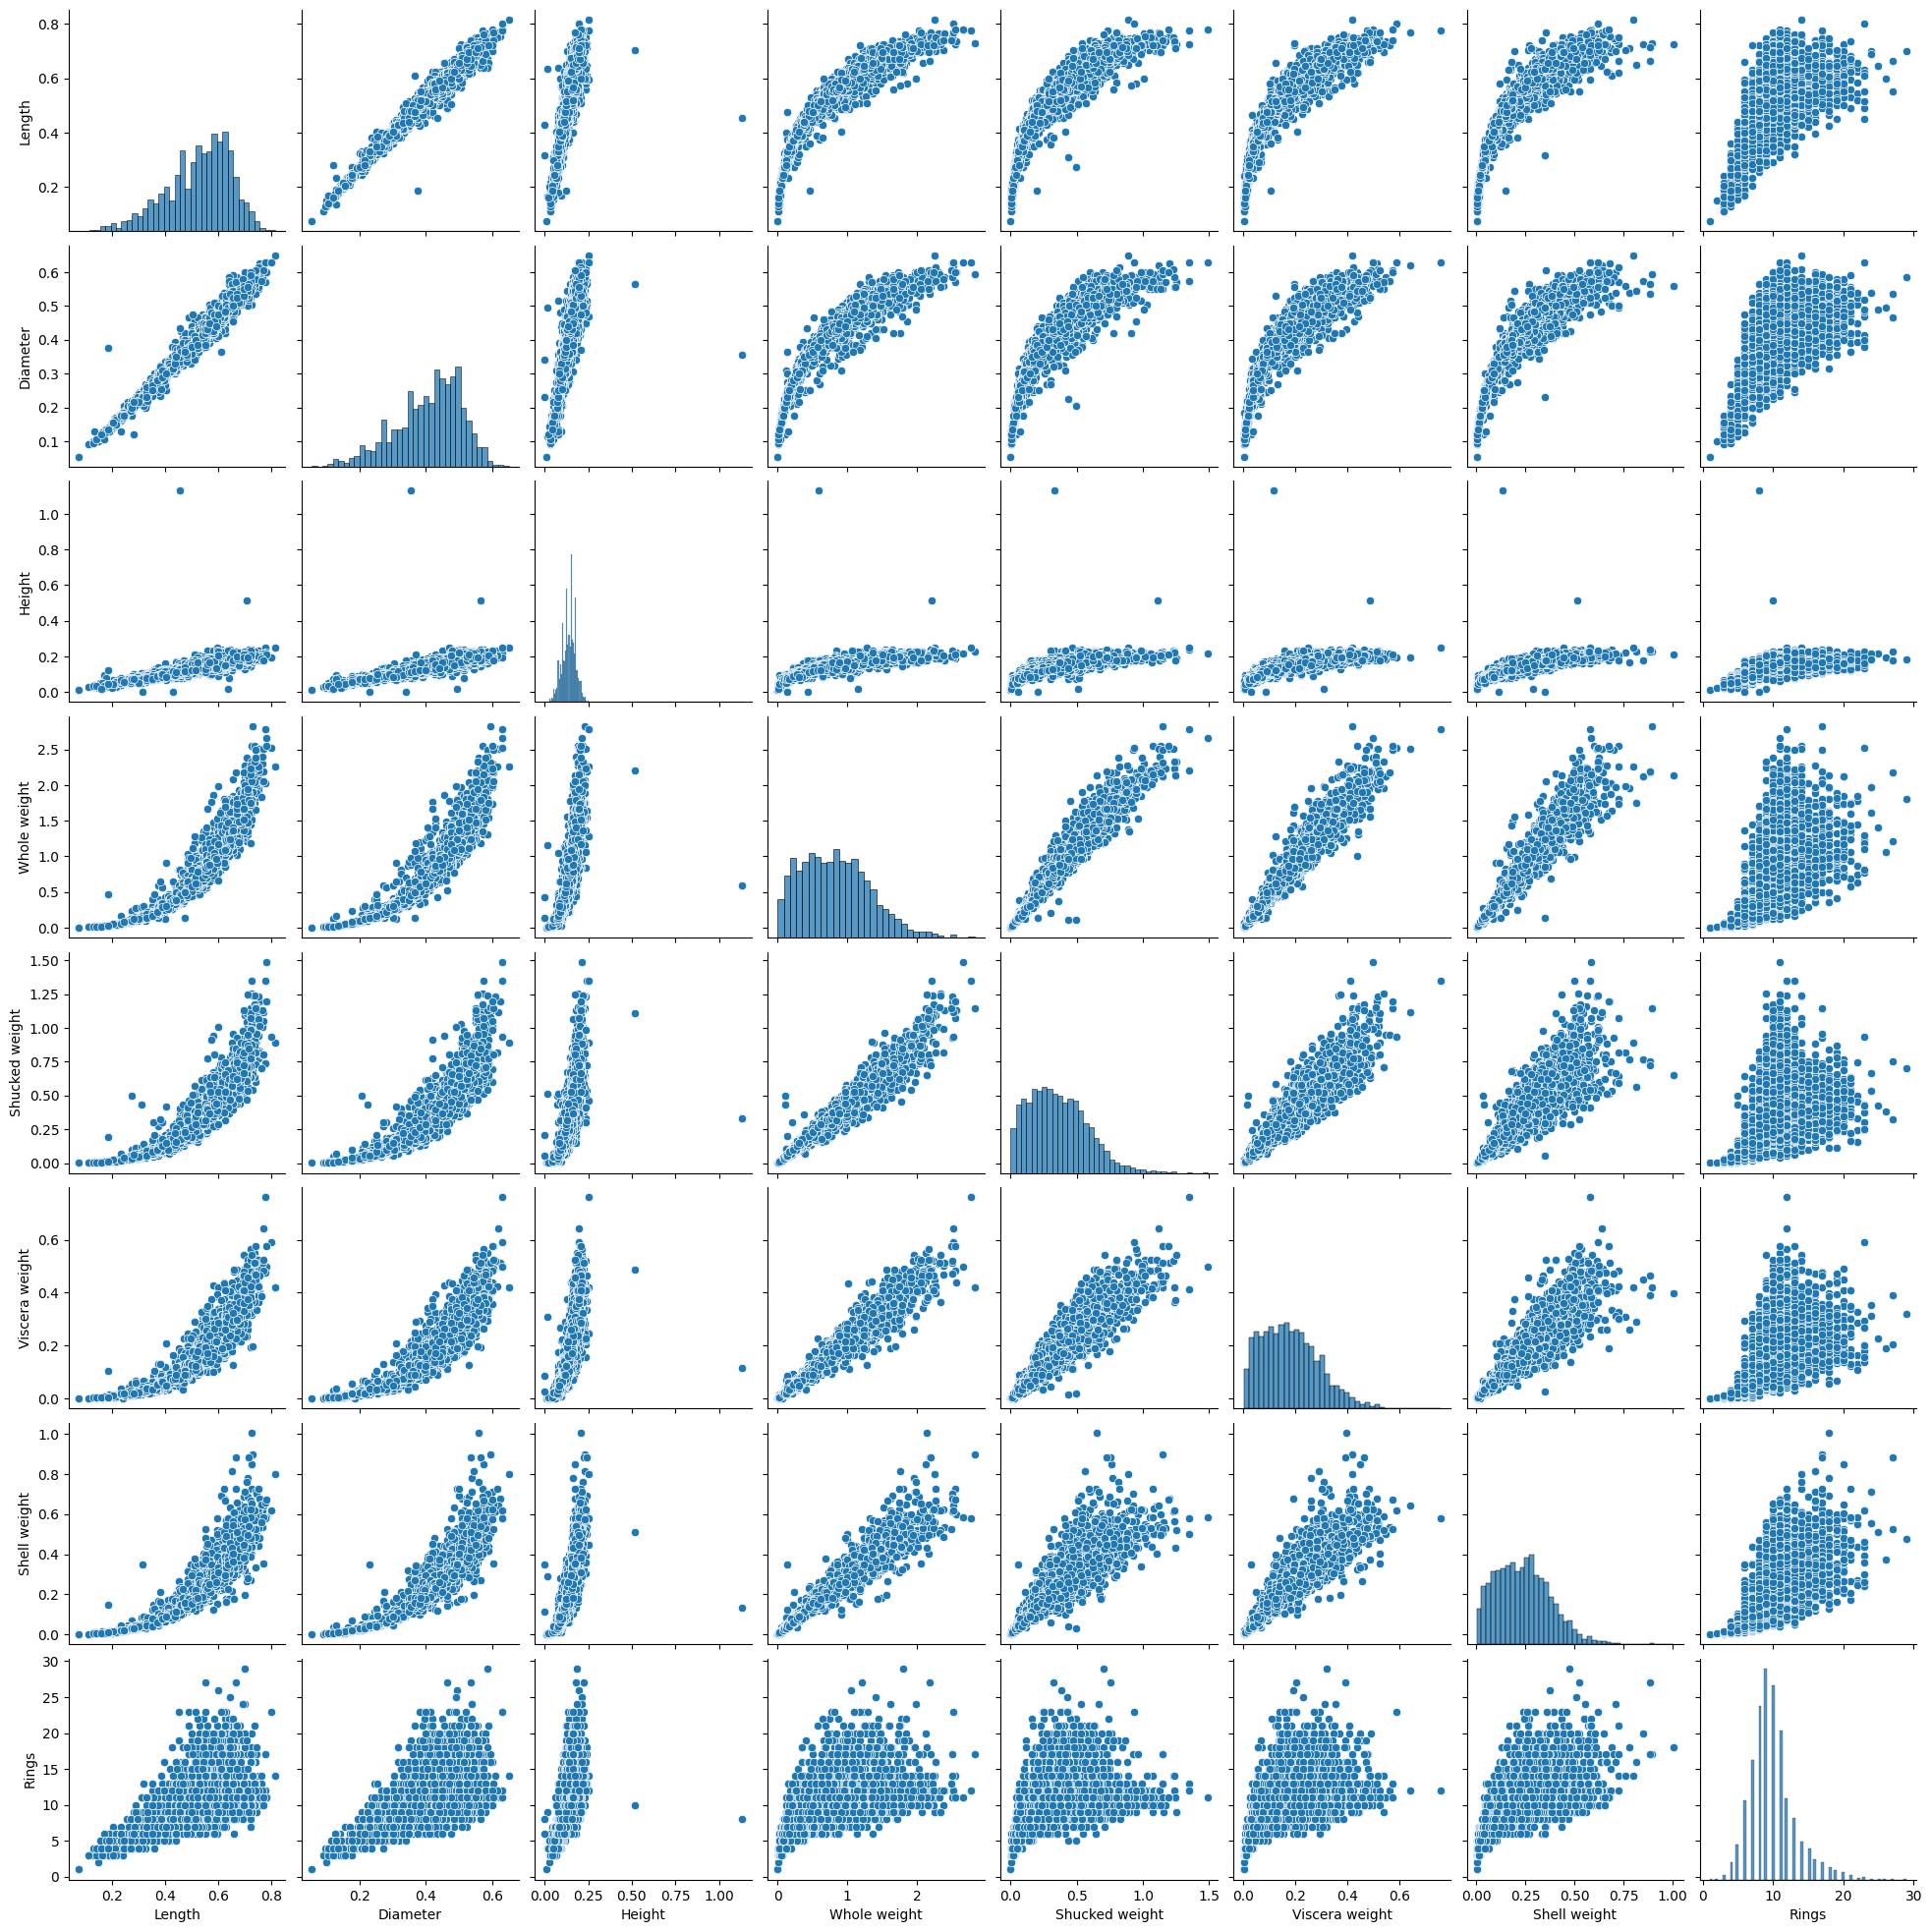

In [4]:
sns.pairplot(data)

## **Label Encoding**

In [5]:
data["Sex"].replace(["F","M","I"],[0,1,2],inplace=True)

<Axes: >

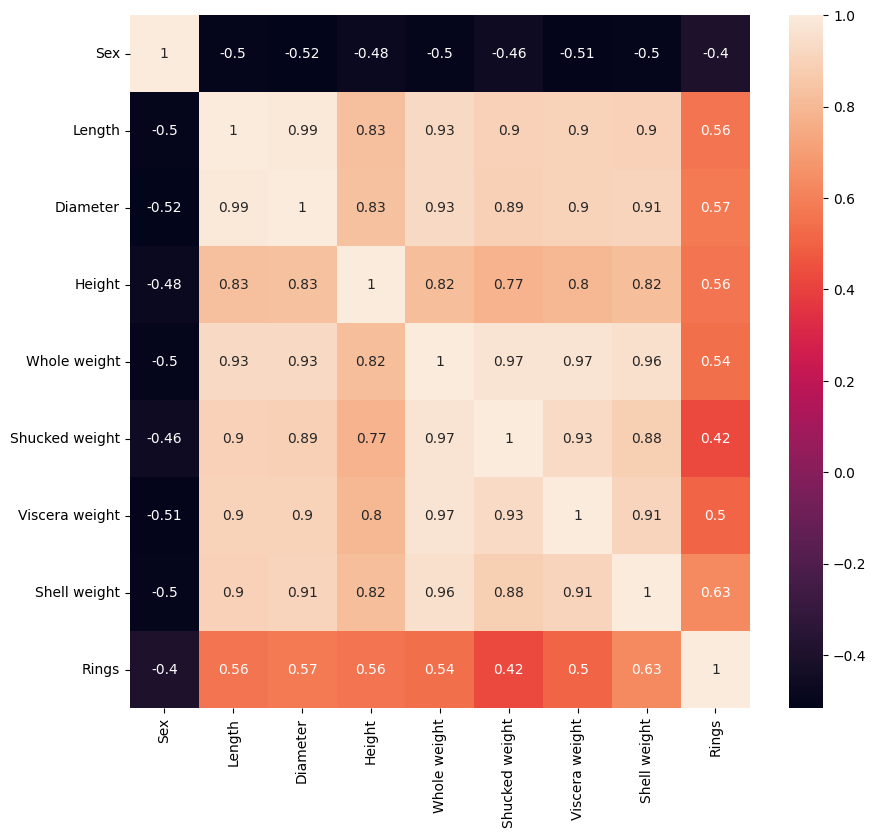

In [6]:
corr = data.corr()
plt.figure(figsize=[10,9])
sns.heatmap(data.corr(), annot= True)

In [7]:
data.drop(["Sex"] , axis = 1 , inplace = True)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<Axes: >

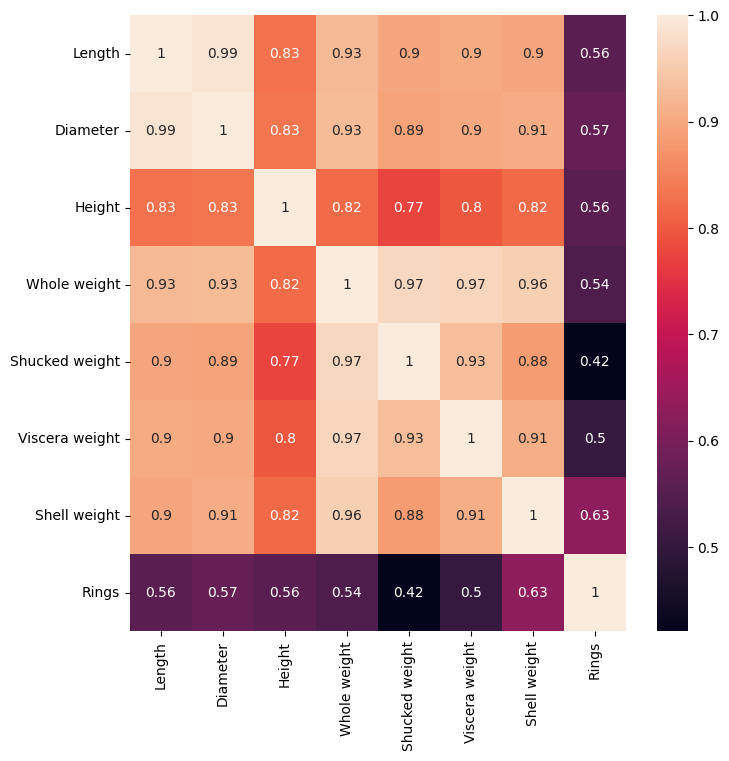

In [8]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data.corr() , annot=True)

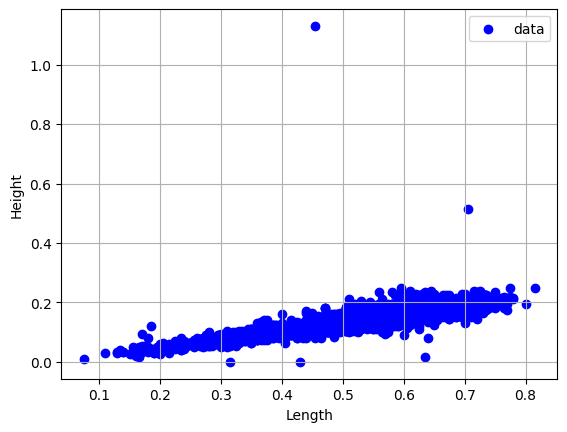

In [9]:
plt.scatter(data['Length'], data['Height'] ,color='blue' , label = "data" )
plt.xlabel("Length")
plt.ylabel("Height")
plt.legend()
plt.grid()
plt.show()

In [10]:
X =np.array( data[["Length"]])

#X_train = X_train.reshape(-1,1)
print(X.shape)

(4177, 1)


In [11]:
Y = np.array(data[['Height']])

#Y_train = Y_train.reshape(-1,1)
print(Y.shape)

(4177, 1)


In [12]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3132, 1)
(3132, 1)
(1045, 1)
(1045, 1)


In [13]:
# W = line slope
# W = (X.T * X)^ -1 * X.T * Y
#W = np.matmul(np.matmul(np.linalg.inv( np.matmul(X.T , X )) , X.T) , Y )
W = inv(X.T @ X) @ X.T @ Y
W

array([[0.26735293]])

In [14]:
Y_pred = X_test * W

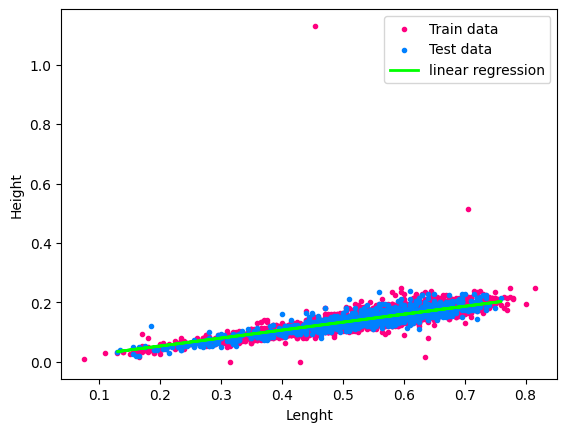

In [15]:
plt.scatter(X_train , Y_train , marker='.' , c='#ff0080')
plt.scatter(X_test , Y_test , marker ='.' , c='#0080ff')
plt.plot(X_test , Y_pred , color = '#00ff00' , lw =2)
plt.xlabel("Lenght")
plt.ylabel("Height")
plt.legend(["Train data" , "Test data" , "linear regression"])
plt.show()

In [16]:
X_test = 0.49 # length
y_pred = W * X_test
print("height :" , y_pred)

height : [[0.13100294]]
